In [ ]:
from snn_delays.datasets.custom_datasets import CustomDataset
from snn_delays.config import DATASET_PATH
from torch.utils.data import DataLoader
import os

from tonic import MemoryCachedDataset
import numpy as np

'''
3-word classification dataset (permuted without repetition)

in total, 6 classes

'''

#data = np.load(os.path.join(DATASET_PATH, 'raw_datasets', 'Letters', 'letter_classification_dataset.npz'))
data = np.load(os.path.join(DATASET_PATH, 'Letters', 'three_permuted_letter_classification_dataset.npz'))

train_data = data['train_data']
test_data = data['test_data']
train_labels= data['train_labels']
test_labels = data['test_labels']

num_samples = len(train_labels)

train_dataset = CustomDataset(train_data, train_labels)
test_dataset = CustomDataset(test_data, test_labels)

dataset_dict = train_dataset.get_train_attributes()

cached_train_dataset = MemoryCachedDataset(train_dataset)
cached_test_dataset = MemoryCachedDataset(test_dataset)

total_time = train_data.shape[1]
print(f'num timesteps per sample: {total_time}')
batch_size = 128

train_loader = DataLoader(cached_train_dataset,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False,
                            pin_memory=True,
                            num_workers=0)

test_loader = DataLoader(cached_test_dataset,
                            batch_size=batch_size,
                            shuffle=True,
                            drop_last=False,
                            pin_memory=True,
                            num_workers=0)

dataset_dict["time_ms"] = 1e3
dataset_dict["dataset_name"] = "letters"

print(dataset_dict)

for img, lbl in train_loader:
    print(img.shape)
    print(lbl.shape)
    break

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


num timesteps per sample: 48
{'num_input': 25, 'num_training_samples': 2400, 'num_output': 6, 'time_ms': 1000.0, 'dataset_name': 'letters'}
torch.Size([128, 48, 1, 25])
torch.Size([128, 6])


In [2]:
sample = img[0].cpu().numpy()
print(sample)

[[[0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 1. 0.]]

 [[1. 1. 0. ... 0. 1. 0.]]

 ...

 [[0. 0. 0. ... 0. 1. 1.]]

 [[0. 0. 0. ... 0. 0. 0.]]

 [[0. 1. 0. ... 0. 0. 0.]]]


In [3]:
reference = lbl[0].cpu().numpy()
print(reference)

[0. 0. 1. 0. 0. 0.]


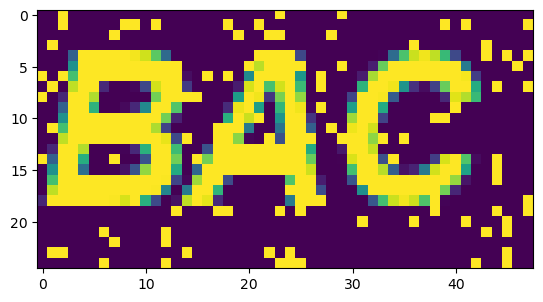

In [4]:
import matplotlib.pyplot as plt
plt.imshow(sample[:, 0, :].T)